The purpose of this notebook is to set a baseline from which to build a more solid project. Thus, we will use only data from one HSB (health service building). 

In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
original_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/datos.xlsx')
original_df.sort_values(['Timestamp'], ascending=True, inplace=True)
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'], unit='s')
original_df['date'] = pd.to_datetime(original_df['Timestamp'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m-%d')))

In [3]:
marag_df = original_df[original_df['SiteId'] == 2][['Timestamp', 'date', 'TotalEntries']]

In [11]:
X = marag_df.set_index('date')

In [18]:
marag_df.dtypes

Timestamp       datetime64[ns]
date            datetime64[ns]
TotalEntries             int64
dtype: object

/home/quark/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


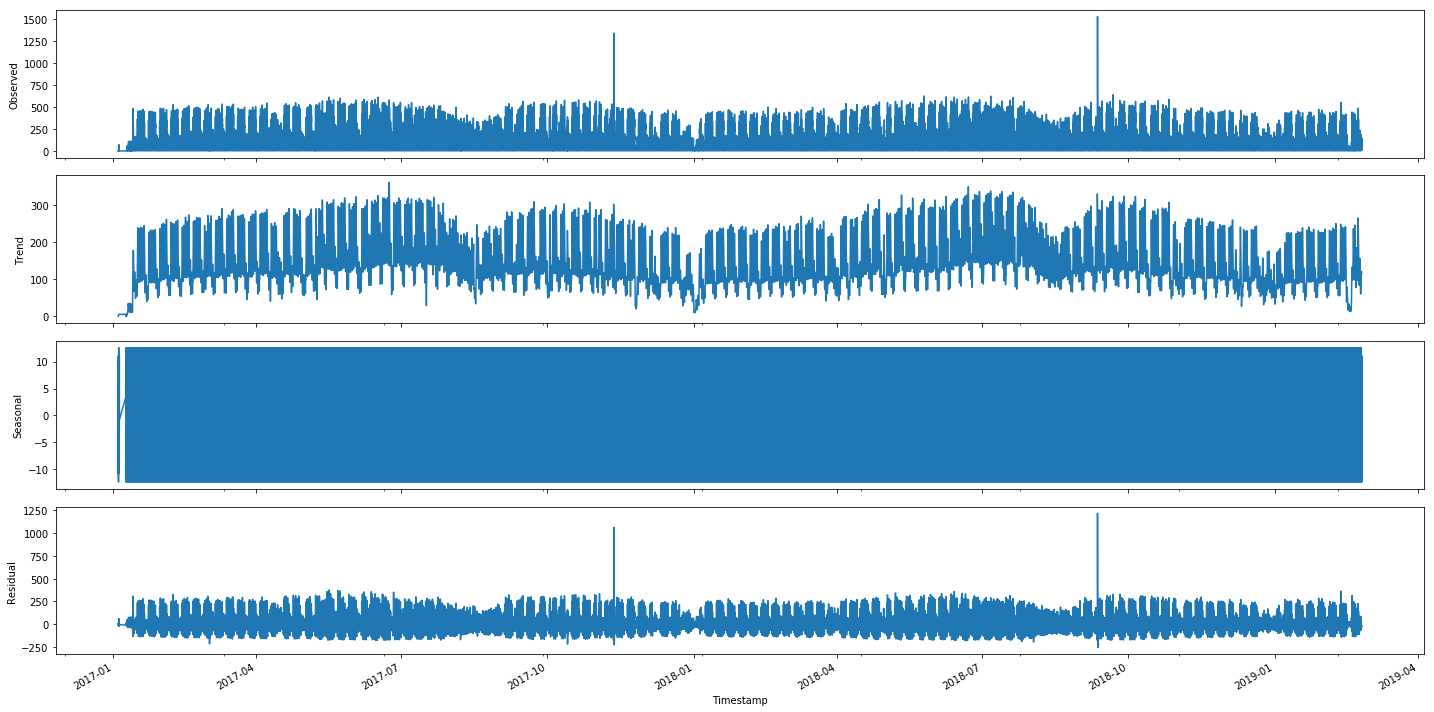

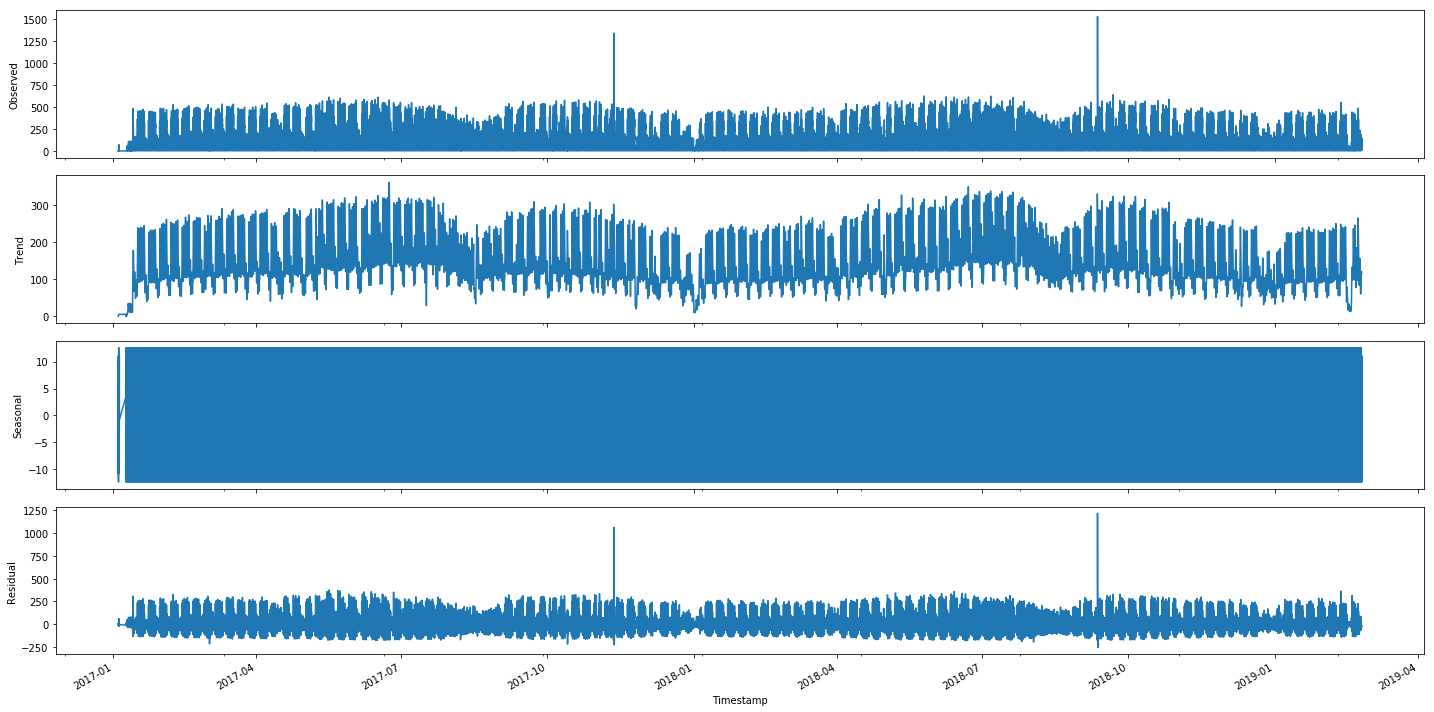

In [32]:
seasonal_decompose(marag_df.set_index('Timestamp').drop('date', axis=1), freq=30, model='additive').plot()

In [5]:
marag_mvp_df.head()

,Timestamp,TotalEntries
4320,2017-01-04 00:00:00,0
4321,2017-01-04 00:30:00,0
4322,2017-01-04 01:00:00,0
4323,2017-01-04 01:30:00,0
4324,2017-01-04 02:00:00,0


In [9]:
marag_mvp_df.head(50)

,TotalEntries
Timestamp,
2017-01-04 00:00:00,0
2017-01-04 00:30:00,0
2017-01-04 01:00:00,0
2017-01-04 01:30:00,0
2017-01-04 02:00:00,0
2017-01-04 02:30:00,0
2017-01-04 03:00:00,0
2017-01-04 03:30:00,0
2017-01-04 04:00:00,0


## Test Harness:

1. Define dataset


2. Define resampling technique (train/test split, for example):
from sklearn.model selection import train_test_split


3. Define the performance measure to evaluate forecasts:
RMSE

In [9]:
def df_baseline_prep(x):
    initial_df = pd.read_excel('/home/quark/Documents/projects/TFM/Databases/datos.xlsx')
    initial_df.sort_values(['Timestamp'], ascending=True, inplace=True)
    initial_df['Timestamp'] = pd.to_datetime(initial_df['Timestamp'], unit='s')
    
    intermediate_df = initial_df[initial_df['SiteId'] == x][['Timestamp', 'TotalEntries']]
    intermediate_df.set_index('Timestamp', inplace=True)
        
    final_df = pd.concat([pd.DataFrame(intermediate_df['TotalEntries'].values).shift(1), pd.DataFrame(intermediate_df['TotalEntries'].values)], axis = 1)
    final_df.set_index(intermediate_df.index, inplace=True)
    final_df.columns = ['t', 't+1']
    final_df = final_df.iloc[1:]
    
    return final_df

In [10]:
ravndf = df_baseline_prep(1)
maragdf = df_baseline_prep(2)
jaudf = df_baseline_prep(3)

## Baseline: persistance model

In [4]:
def persistance_model_def(x):
    X_train, X_test, y_train, y_test = train_test_split(x['t'], x['t+1'], test_size = 0.2, random_state = 42, shuffle=False)
    y_hat = X_test
    rmse = sqrt(mean_squared_error(y_test, y_hat))
    print('Test RMSE: {:.2f}'.format(rmse))
    residuals = y_test - y_hat
    #print('Test RMSE: {:.2f} in {} days!'.format(rmse, len(y_test.groupby(pd.Grouper(freq='D')).sum())))
    #print('-' * 50)
    #MSE_daily = (((y_test.groupby(pd.Grouper(freq='D')).sum() - y_hat.groupby(pd.Grouper(freq='D')).sum()) ** 2) / len(y_test.groupby(pd.Grouper(freq='D')).sum())).sum()
    #print('Test daily grouped RMSE: {:.2f}'.format(sqrt(MSE_daily)))

In [22]:
persistance_model_def(maragdf)

Test RMSE: 44.19


In [36]:
persistance_model_def(ravndf)

Test RMSE: 139.63


In [24]:
persistance_model_def(jaudf)

Test RMSE: 39.82


### Compare baseline to average/median forecast

In [5]:
def mean_median_baseline(x): 
    X_train, X_test, y_train, y_test = train_test_split(x['t'], x['t+1'], test_size = 0.2, random_state = 42, shuffle=False)
    y_hat_mean = pd.concat([pd.Series(x['t'].mean())] * y_test.count())
    y_hat_median = pd.concat([pd.Series(x['t'].median())] * y_test.count())                      

    rmse_mean = sqrt(mean_squared_error(y_test, y_hat_mean))
    rmse_median = sqrt(mean_squared_error(y_test, y_hat_median))
    print('Test RMSE forecasting with mean: {:.2f}'.format(rmse_mean))
    print('-' * 50)
    print('Test RMSE forecasting with median: {:.2f}'.format(rmse_median))

In [34]:
mean_median_baseline(ravndf)

Test RMSE forecasting with mean: 465.99
--------------------------------------------------
Test RMSE forecasting with median: 495.81


In [37]:
mean_median_baseline(maragdf)

Test RMSE forecasting with mean: 120.18
--------------------------------------------------
Test RMSE forecasting with median: 119.23


In [38]:
mean_median_baseline(jaudf)

Test RMSE forecasting with mean: 88.65
--------------------------------------------------
Test RMSE forecasting with median: 88.94


In [178]:
MSE_daily = (((y_test.groupby(pd.Grouper(freq='D')).sum() - y_hat.groupby(pd.Grouper(freq='D')).sum()) ** 2) / len(y_test.groupby(pd.Grouper(freq='D')).sum())).sum()
print('Test daily grouped RMSE: {:.2f}'.format(sqrt(MSE_daily)))

Test daily grouped RMSE: 33.98


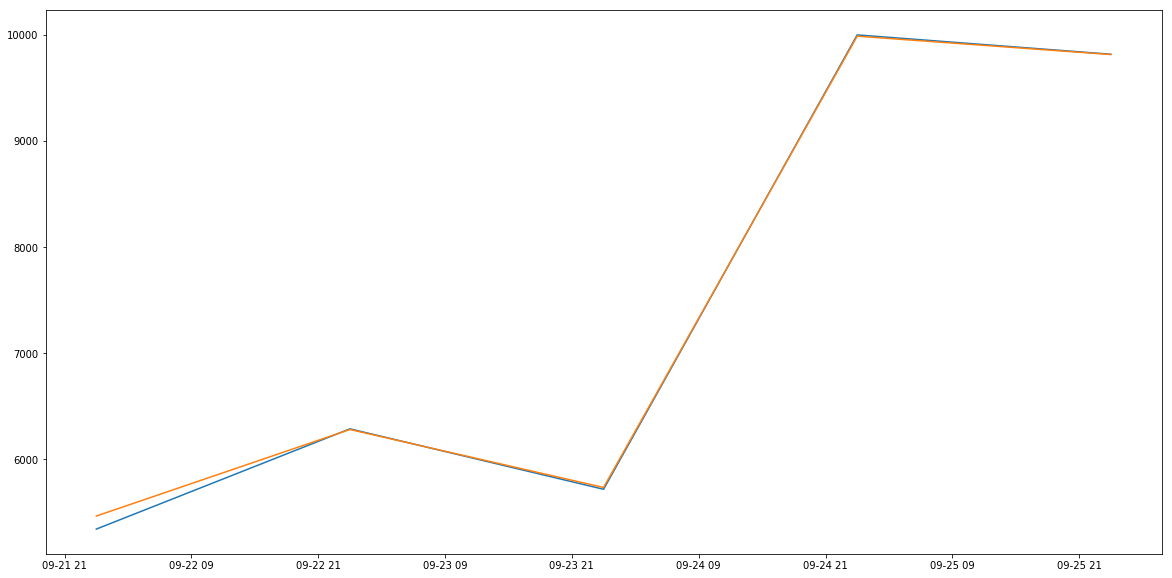

In [179]:
#plt.plot(y_train.groupby(pd.Grouper(freq='D')).sum())
plt.plot(y_test.groupby(pd.Grouper(freq='D')).sum()[:5])
plt.plot(y_hat.groupby(pd.Grouper(freq='D')).sum()[:5])

In [16]:
# Plotting the residual Autocorrelation Plot in maragall data:

X_train, X_test, y_train, y_test = train_test_split(maragdf['t'], maragdf['t+1'], test_size = 0.2, random_state = 42, shuffle=False)
y_hat = X_test
rmse = sqrt(mean_squared_error(y_test, y_hat))
print('Test RMSE: {:.2f}'.format(rmse))
residuals = y_test - y_hat

Test RMSE: 44.19


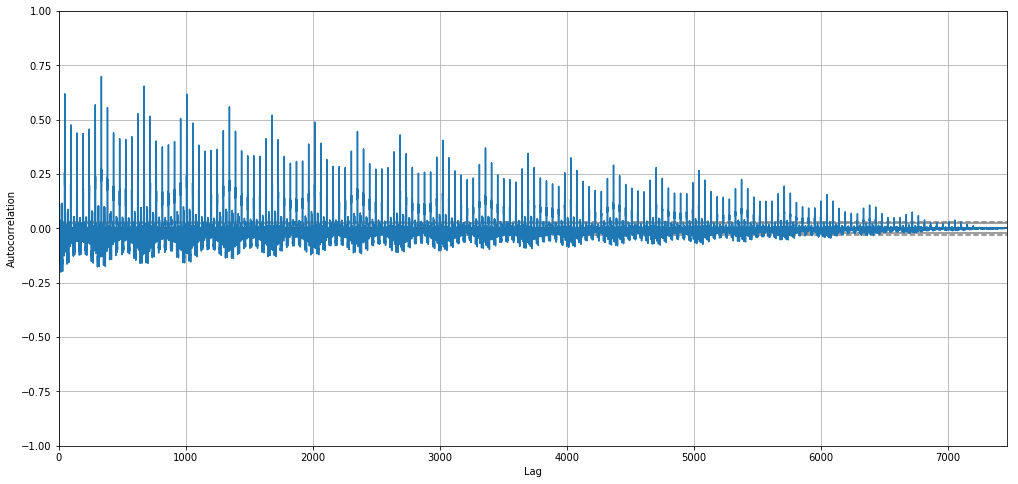

In [19]:
plt.figure(figsize=(17,8))
pd.plotting.autocorrelation_plot(residuals)

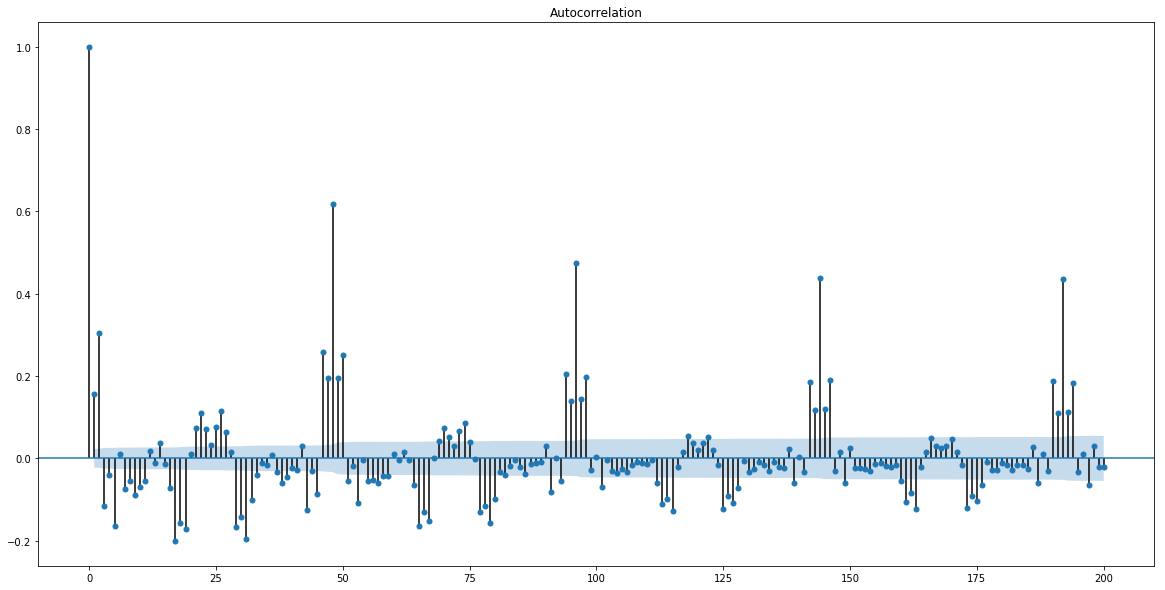

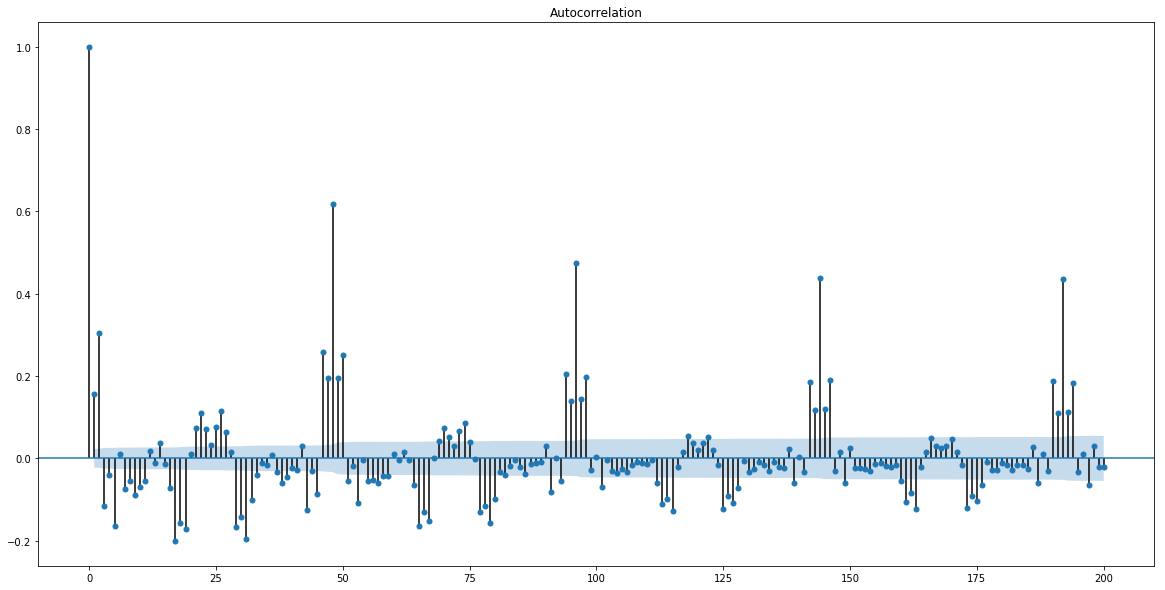

In [24]:
plot_acf(residuals, lags=200)

# Decomposition of the series

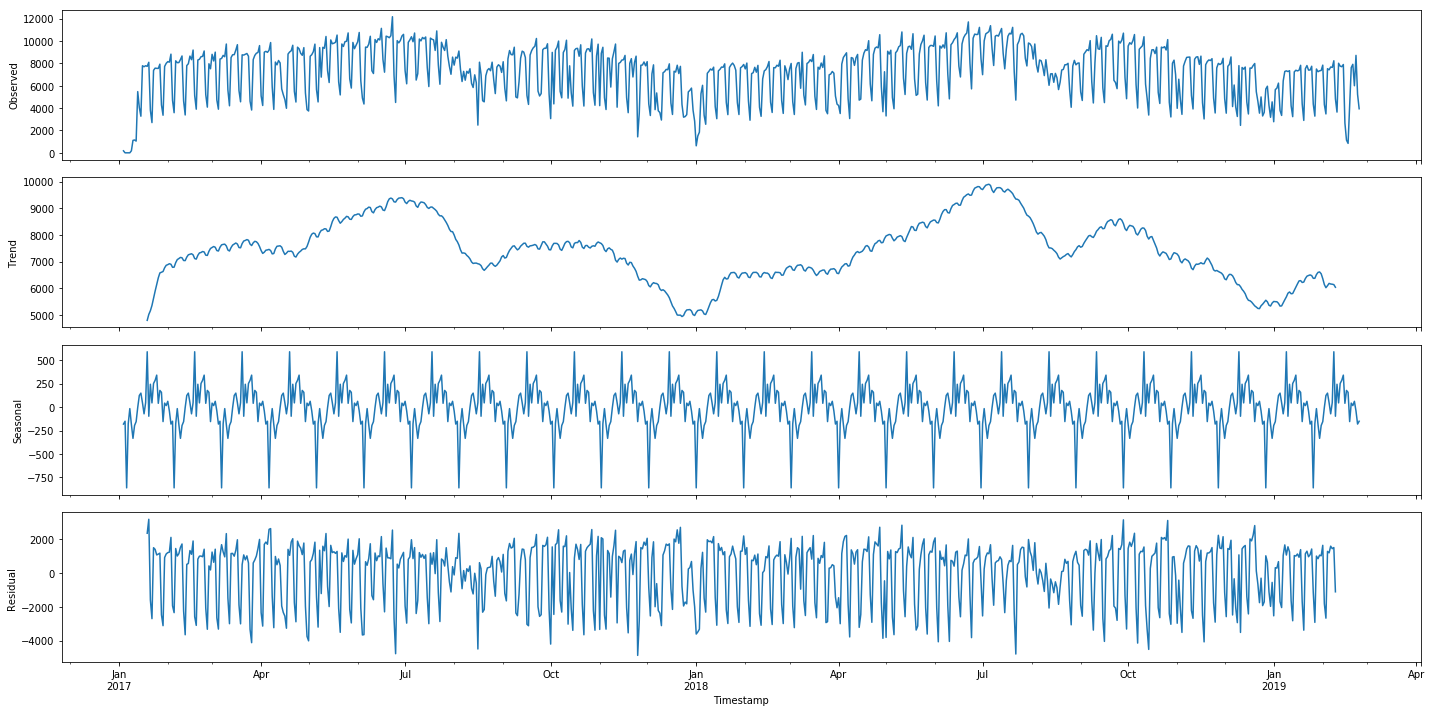

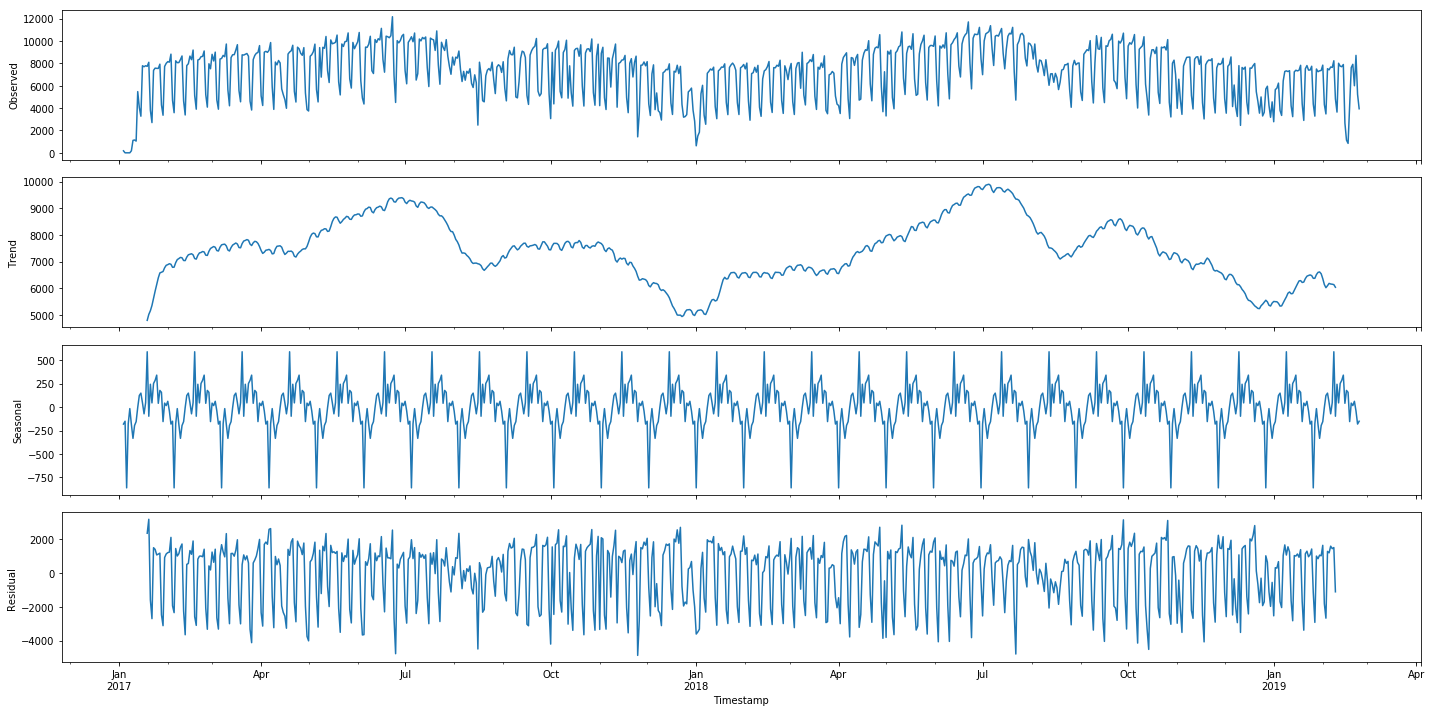

In [126]:
seasonal_decompose(cmvp.drop('t + 1', axis=1).groupby(pd.Grouper(freq='D')).sum(), freq=30, model='additive').plot()